In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
income= gpd.read_file('econ_ward.geojson') # import the data

In [3]:
income.head(2)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,...,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",...,5.9,9.5,13.6,14.2,10.2,3.5,18.6,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."
1,2,11,008,11008,Ward 8,22429470,8473345,+38.8390139,-077.0071260,"Ward 8, District of Columbia",...,36.8,40.9,26.3,26.4,25.5,29.0,34.7,0,0,"POLYGON ((-77.04801 38.84127, -77.04802 38.841..."


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
income.head(2)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,DP03_0001,DP03_0002,DP03_0003,DP03_0004,DP03_0005,DP03_0006,DP03_0007,DP03_0008,DP03_0009P,DP03_0010,DP03_0011,DP03_0012,DP03_0013,DP03_0014,DP03_0015,DP03_0016,DP03_0017,DP03_0018,DP03_0019,DP03_0020,DP03_0021,DP03_0022,DP03_0023,DP03_0024,DP03_0025,DP03_0026,DP03_0027,DP03_0028,DP03_0029,DP03_0030,DP03_0031,DP03_0032,DP03_0033,DP03_0034,DP03_0035,DP03_0036,DP03_0037,DP03_0038,DP03_0039,DP03_0040,DP03_0041,DP03_0042,DP03_0043,DP03_0044,DP03_0045,DP03_0046,DP03_0047,DP03_0048,DP03_0049,DP03_0050,DP03_0051,DP03_0052,DP03_0053,DP03_0054,DP03_0055,DP03_0056,DP03_0057,DP03_0058,DP03_0059,DP03_0060,DP03_0061,DP03_0062,DP03_0063,DP03_0064,DP03_0065,DP03_0066,DP03_0067,DP03_0068,DP03_0069,DP03_0070,DP03_0071,DP03_0072,DP03_0073,DP03_0074,DP03_0075,DP03_0076,DP03_0077,DP03_0078,DP03_0079,DP03_0080,DP03_0081,DP03_0082,DP03_0083,DP03_0084,DP03_0085,DP03_0086,DP03_0087,DP03_0088,DP03_0089,DP03_0090,DP03_0091,DP03_0092,DP03_0093,DP03_0094,DP03_0095,DP03_0096,DP03_0097,DP03_0098,DP03_0099,DP03_0100,DP03_0101,DP03_0102,DP03_0103,DP03_0104,DP03_0105,DP03_0106,DP03_0107,DP03_0108,DP03_0109,DP03_0110,DP03_0111,DP03_0112,DP03_0113,DP03_0114,DP03_0115,DP03_0116,DP03_0117,DP03_0118,DP03_0119P,DP03_0120P,DP03_0121P,DP03_0122P,DP03_0123P,DP03_0124P,DP03_0125P,DP03_0126P,DP03_0127P,DP03_0128P,DP03_0129P,DP03_0130P,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",74203,52550,52284,50504,1780,266,21653,52284,3.4,38367,26815,26705,25743,2366,1697,1456,1102,49864,8382,1050,11299,18760,3813,6560,23.9,50504,39246,3353,6980,327,598,50504,46,803,577,257,1476,425,1937,4913,15851,8703,3080,4968,7468,50504,38057,10359,1956,132,38857,2611,831,1231,1224,1695,4752,4064,7752,4342,10355,114649,165977,33658,166783,5735,20729,4337,52421,693,9305,150,3809,1335,9337,115,23,190,121,232,501,496,1387,1258,5014,212937,269705,85777,29520,100006,131992,70133,108056,87384,77425,75644,70048,11674,1781,6836,20,62065,48273,46608,45476,44474,1317,1132,1665,1554,1232,332,111,13792,13308,11972,1760,484,2.8,5.1,0.0,2.0,3.9,0.0,17.8,21.5,0.0,13.3,7.4,7.4,5.9,9.5,13.6,14.2,10.2,3.5,18.6,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."
1,2,11,008,11008,Ward 8,22429470,8473345,+38.8390139,-077.0071260,"Ward 8, District of Columbia",61808,38346,36998,30560,6438,1348,23462,36998,17.4,34588,20986,20823,17360,9476,6921,14322,10382,31111,14130,2133,11568,1023,727,1530,36.0,30560,10332,8488,7368,1358,3014,30560,59,1451,285,505,2700,2450,379,1678,4557,6231,4451,1801,4013,30560,21766,8161,603,30,32194,5473,2672,3480,3522,4450,3834,2941,3013,1552,1257,37963,62260,23049,70274,7543,11331,4651,30040,3986,9384,2900,3411,11237,16493,2381,1027,1589,1676,2341,2302,1801,1759,953,664,43617,66731,25573,15701,32092,54725,33644,43856,50195,82781,79410,34745,52653,3371,26402,365,47888,34780,28821,27239,18672,10357,1582,5959,5403,1158,4613,556,13108,12243,3205,10129,865,26.2,34.7,31.9,6.9,8.3,2.2,35.3,43.0,35.9,30.4,39.8,39.5,36.8,40.9,26.3,26.4,25.5,29.0,34.7,0,0,"POLYGON ((-77.04801 38.84127, -77.04802 38.841..."


In [5]:
# rename "NAMELSAD" to "WARD" to be consistent with gsl data for merging
income.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
income.rename(columns={'INTPTLAT':'LATITUDE'}, inplace=True),
income.rename(columns={'INTPTLON':'LONGITUDE'}, inplace=True),
income.rename(columns={'DP03_0051':'Total Households'}, inplace=True),
income.rename(columns={'DP03_0086':'Median Household Income'}, inplace=True),
income.tail(1)

,OBJECTID,STATEFP,SLDUST,GEOID,WARD,ALAND,AWATER,LATITUDE,LONGITUDE,NAME,DP03_0001,DP03_0002,DP03_0003,DP03_0004,DP03_0005,DP03_0006,DP03_0007,DP03_0008,DP03_0009P,DP03_0010,DP03_0011,DP03_0012,DP03_0013,DP03_0014,DP03_0015,DP03_0016,DP03_0017,DP03_0018,DP03_0019,DP03_0020,DP03_0021,DP03_0022,DP03_0023,DP03_0024,DP03_0025,DP03_0026,DP03_0027,DP03_0028,DP03_0029,DP03_0030,DP03_0031,DP03_0032,DP03_0033,DP03_0034,DP03_0035,DP03_0036,DP03_0037,DP03_0038,DP03_0039,DP03_0040,DP03_0041,DP03_0042,DP03_0043,DP03_0044,DP03_0045,DP03_0046,DP03_0047,DP03_0048,DP03_0049,DP03_0050,Total Households,DP03_0052,DP03_0053,DP03_0054,DP03_0055,DP03_0056,DP03_0057,DP03_0058,DP03_0059,DP03_0060,DP03_0061,DP03_0062,DP03_0063,DP03_0064,DP03_0065,DP03_0066,DP03_0067,DP03_0068,DP03_0069,DP03_0070,DP03_0071,DP03_0072,DP03_0073,DP03_0074,DP03_0075,DP03_0076,DP03_0077,DP03_0078,DP03_0079,DP03_0080,DP03_0081,DP03_0082,DP03_0083,DP03_0084,DP03_0085,Median Household Income,DP03_0087,DP03_0088,DP03_0089,DP03_0090,DP03_0091,DP03_0092,DP03_0093,DP03_0094,DP03_0095,DP03_0096,DP03_0097,DP03_0098,DP03_0099,DP03_0100,DP03_0101,DP03_0102,DP03_0103,DP03_0104,DP03_0105,DP03_0106,DP03_0107,DP03_0108,DP03_0109,DP03_0110,DP03_0111,DP03_0112,DP03_0113,DP03_0114,DP03_0115,DP03_0116,DP03_0117,DP03_0118,DP03_0119P,DP03_0120P,DP03_0121P,DP03_0122P,DP03_0123P,DP03_0124P,DP03_0125P,DP03_0126P,DP03_0127P,DP03_0128P,DP03_0129P,DP03_0130P,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
7,8,11,003,11003,Ward 3,26946477,1316331,+38.9383001,-077.0781397,"Ward 3, District of Columbia",71845,50513,50383,48421,1962,130,21332,50383,3.9,40098,27539,27539,26387,5114,4476,8500,6542,47756,17616,1927,14093,3789,2450,7881,28.6,48421,38375,3497,5595,446,508,48421,40,761,449,309,1282,349,2025,3871,13102,10456,2783,4598,8396,48421,33138,11610,3529,144,37508,1957,794,1098,1243,1428,4079,4016,6481,4172,12240,129681,204952,30660,203135,8488,24994,7711,57667,477,8300,312,4291,625,17312,282,94,123,136,118,822,923,2348,2411,10055,236960,318022,94151,20196,82918,104704,75225,122386,91619,84214,82791,75982,17700,1423,15421,219,53869,45165,43517,42765,41566,1568,752,1648,1605,1365,278,43,8704,8354,7418,1138,350,2.3,1.9,1.6,1.2,1.1,0.0,8.6,3.2,19.0,8.0,1.8,1.6,1.1,1.8,9.3,10.4,5.4,2.1,17.9,0,0,"POLYGON ((-77.11975 38.93436, -77.11976 38.934..."


In [6]:
income.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
income_wm = income.to_crs(epsg=3857) #change projection

In [8]:
income_columns_keep=['WARD','LATITUDE','LONGITUDE','Median Household Income','geometry']

In [9]:
income_trimmed = income_wm[income_columns_keep].copy() #create new data frame with trimmed data
income_trimmed = income_trimmed.dropna()
income_trimmed.head(3)

,WARD,LATITUDE,LONGITUDE,Median Household Income,geometry
0,Ward 2,+38.8926196,-077.0427418,212937,"POLYGON ((-8580696.853 4709851.992, -8580698.4..."
1,Ward 8,+38.8390139,-077.0071260,43617,"POLYGON ((-8576945.384 4698960.838, -8576946.6..."
2,Ward 6,+38.8866683,-077.0028435,169889,"POLYGON ((-8575142.899 4704858.627, -8575203.4..."


In [10]:
income_trimmed.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   WARD                     8 non-null      object  
 1   LATITUDE                 8 non-null      object  
 2   LONGITUDE                8 non-null      object  
 3   Median Household Income  8 non-null      int64   
 4   geometry                 8 non-null      geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 448.0+ bytes


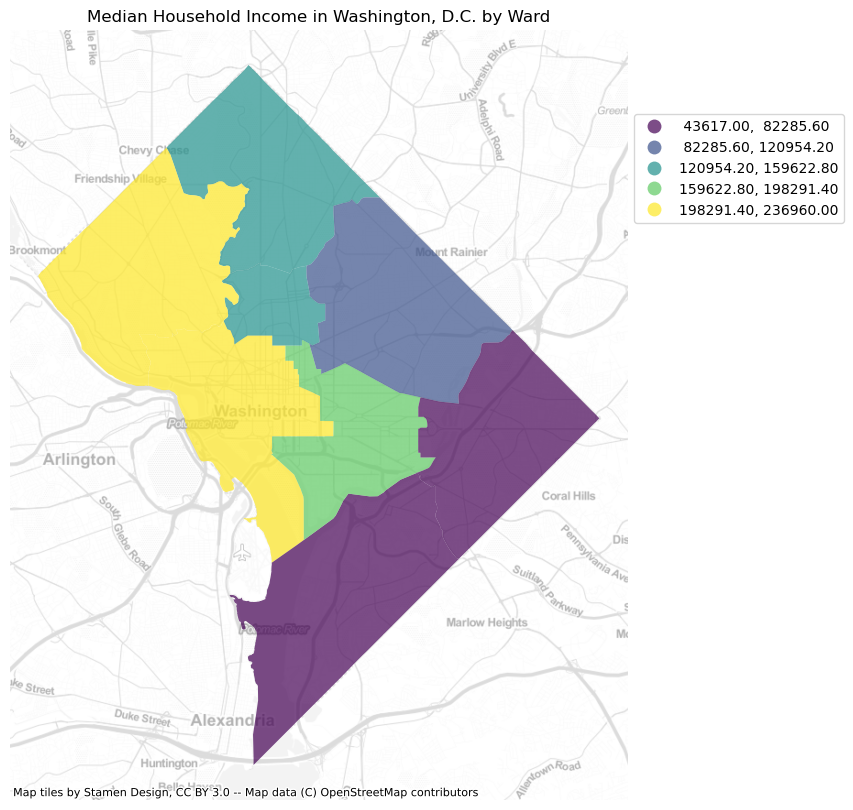

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
income_trimmed.plot(figsize=(12,10), # plot the data
                 column='Median Household Income',
                 legend=True, 
                 ax=ax,
                 legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                 scheme='equal_interval', alpha=0.7)         
ax.set_title('Median Household Income in Washington, D.C. by Ward') # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

In [12]:
gsl = pd.read_csv('Grocery_Store_Locations.csv') # import the data

In [13]:
gsl.shape

(82, 36)

In [14]:
gsl.head(2)

,X,Y,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,PRESENT95,PRESENT00,PRESENT05,PRESENT08,PRESENT09,PRESENT10,PRESENT11,PRESENT12,PRESENT13,PRESENT14,PRESENT15,PRESENT16,PRESENT17,PRESENT18,GIS_ID,OBJECTID,XCOORD,YCOORD,MAR_ID,SE_ANNO_CAD_DATA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,PRESENT22
0,-77.026981,38.984455,Target,7828 GEORGIA AVENUE NW,20012,2028923822,Ward 4,2960 0017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GroceryStorePt_1,641,397662.57,146280.07,300512,NaN,{CE302122-4E8D-4DC7-845B-06563B993F66},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes
1,-77.026066,38.983464,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2025455015,Ward 4,2961 0810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GroceryStorePt_2,642,397741.80,146169.97,285417,NaN,{2C18863D-40DE-4F66-AA59-46F1C65D67F2},JLAY,2022/09/28 18:04:54+00,JLAY,2022/09/28 18:04:54+00,Yes


In [15]:
gsl.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 82 non-null     float64
 1   Y                 82 non-null     float64
 2   STORENAME         82 non-null     object 
 3   ADDRESS           82 non-null     object 
 4   ZIPCODE           82 non-null     int64  
 5   PHONE             82 non-null     int64  
 6   WARD              82 non-null     object 
 7   SSL               82 non-null     object 
 8   NOTES             53 non-null     object 
 9   PRESENT90         55 non-null     object 
 10  PRESENT95         55 non-null     object 
 11  PRESENT00         55 non-null     object 
 12  PRESENT05         55 non-null     object 
 13  PRESENT08         55 non-null     object 
 14  PRESENT09         55 non-null     object 
 15  PRESENT10         55 non-null     object 
 16  PRESENT11         55 non-null     object 
 17 

In [16]:
gsl['STORE TYPE']= 'Grocery store' # create a new column "store type"

In [17]:
# subset the data
desired_columns= ['X','Y','STORENAME','WARD', 'STORE TYPE']
gsl_trimmed = gsl[desired_columns].copy()
gsl_trimmed = gsl_trimmed.dropna()
gsl_trimmed.sample(1)

,X,Y,STORENAME,WARD,STORE TYPE
24,-76.974819,38.929451,Good Food Markets,Ward 5,Grocery store


In [18]:
healthy= pd.read_csv('Healthy_Corner_Stores.csv') # import healthy corner store data

In [19]:
healthy.shape # tells me how many rows and columns in the data set

(71, 17)

In [20]:
healthy.head()

,X,Y,OBJECTID,STORE,ADDRESS,XCOORD,YCOORD,MATCHTYPE,MAR_ID,LATITUDE,LONGITUDE,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.019079,38.975046,1,BP Blaire Gas Station,7000 Blair Rd NW,398346.95,145235.41,Exact,249127.0,38.975039,-77.019077,HealthyCornerStorePt_1,{F6CD05AE-1648-404D-B7A3-603BE5E3361B},NaN,NaN,NaN,NaN
1,-77.028431,38.961525,2,Missouri Avenue Market,5900 Georgia Ave NW,397536.12,143734.68,Exact,253189.0,38.961518,-77.028429,HealthyCornerStorePt_2,{87C1AAA2-139C-4A8D-AA34-DF7A3AA1312C},NaN,NaN,NaN,NaN
2,-77.010355,38.956438,3,Capital View Convenience Store,12 Kennedy St NW,399102.65,143169.61,Exact,283923.0,38.956431,-77.010353,HealthyCornerStorePt_3,{77D178A5-1D12-492B-A96C-5D0FFC242C97},NaN,NaN,NaN,NaN
3,-77.027749,38.955825,4,S&G Liquor and Grocery,5421 Georgia Ave NW,397595.00,143101.81,Exact,254615.0,38.955817,-77.027747,HealthyCornerStorePt_4,{D8EB793F-418B-43A8-843B-DA0CFACA0832},NaN,NaN,NaN,NaN
4,-77.020196,38.955826,5,Starlight Food,5424 5th St NW,0.00,0.00,Manual,NaN,NaN,NaN,HealthyCornerStorePt_5,{1DA97531-D58F-4F82-9D9B-4071D1B7B361},NaN,NaN,NaN,NaN


In [21]:
healthy.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          71 non-null     float64
 1   Y          71 non-null     float64
 2   OBJECTID   71 non-null     int64  
 3   STORE      71 non-null     object 
 4   ADDRESS    71 non-null     object 
 5   XCOORD     71 non-null     float64
 6   YCOORD     71 non-null     float64
 7   MATCHTYPE  71 non-null     object 
 8   MAR_ID     68 non-null     float64
 9   LATITUDE   68 non-null     float64
 10  LONGITUDE  68 non-null     float64
 11  GIS_ID     71 non-null     object 
 12  GLOBALID   71 non-null     object 
 13  CREATOR    0 non-null      float64
 14  CREATED    0 non-null      float64
 15  EDITOR     0 non-null      float64
 16  EDITED     0 non-null      float64
dtypes: float64(11), int64(1), object(5)
memory usage: 9.6+ KB


In [22]:
# rename "store" to "storename" to be consistent with gsl data for merging
healthy.rename(columns={'STORE':'STORENAME'}, inplace=True)
healthy.tail(1)

,X,Y,OBJECTID,STORENAME,ADDRESS,XCOORD,YCOORD,MATCHTYPE,MAR_ID,LATITUDE,LONGITUDE,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
70,-77.007553,38.825895,71,Elmira Grocery,4401 South Capitol Street SW,399344.35,128678.31,Exact,299727.0,38.825888,-77.007551,HealthyCornerStorePt_71,{B521A46A-D853-4EC3-83DF-C207EBB2CD5E},NaN,NaN,NaN,NaN


In [23]:
healthy['STORE TYPE']= 'Healthy corner store' # add a new column with the input "healthy corner store"

In [24]:
# subset the data
desired_columns_healthy= ['X','Y','STORENAME','STORE TYPE'] # only keep the necessary columns
healthy[desired_columns_healthy].sample(3)
healthy_trimmed = healthy[desired_columns_healthy].copy()
healthy_trimmed = healthy_trimmed.dropna()
healthy_trimmed.sample(3)

,X,Y,STORENAME,STORE TYPE
16,-76.986045,38.925065,Quick Trip,Healthy corner store
55,-76.984830,38.866908,New Seven Market,Healthy corner store
11,-77.022932,38.928836,Market 77,Healthy corner store


In [25]:
all_stores= pd.concat([gsl_trimmed, healthy_trimmed], axis=0) # merge the data using the concatenation function
all_stores.sample(3) # make sure the concatenation worked

,X,Y,STORENAME,WARD,STORE TYPE
20,-77.072999,38.934351,Giant,Ward 3,Grocery store
73,-76.992431,38.919230,Giant,Ward 5,Grocery store
70,-77.024859,38.938456,Safeway,Ward 4,Grocery store


In [26]:
all_stores.shape

(153, 5)

In [27]:
# import basemap from folium
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')
# loop to add markers to the store locations 
for index, row in all_stores.iterrows():
    print(row.STORENAME, row.X, row.Y)

Target  -77.0269805790129 38.9844552988866
International Progresso Market -77.0260657546085 38.9834637018227
Jocelyn’s Market  -77.0277982734047 38.9677712350042
Magruder's -77.0764593007974 38.9655532402862
Safeway -77.0749096653148 38.9646007197834
Walmart Supercenter -77.0272851396928 38.962078321939
Walmart Supercenter -77.0021444681289 38.9579766930922
Tropimart International Foods -77.0213178876896 38.9566042517642
Rodman’s  -77.0838608276822 38.9563029882965
Avenue Market -77.0123007836538 38.9514161546653
Whole Foods -77.0792147083642 38.9491088872299
Target  -77.080552496299 38.9485365777595
Wagshal’s Market  -77.0957591117584 38.9457215516
Giant -77.0631725104573 38.9445067759354
Yes! Organic -77.0255289707541 38.9410364720762
Morazan Grocery Store -77.0330336144517 38.9394468802695
Yes! Organic -76.9903974420661 38.9368242449082
Target  -77.0580161995249 38.9358594136603
Streets Market -77.0578868641251 38.9352427693639
Yes! Organic -77.0577904942142 38.9351664266393
Giant -

In [28]:
# create choropleth map for percent black population in census tracts
folium.Choropleth(
                  geo_data=income_trimmed, 
                  data=income_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'Median Household Income'], 
                  fill_color='PuBuGn',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                  legend_name='Median Household Income').add_to(m)
for index, row in gsl_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='white',icon_color='black')).add_to(m)
for index, row in healthy_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='black')).add_to(m)
# create a legend
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:white;opacity:0.7;'></span>Grocery Stores</li>
    <li><span style='background:Black;opacity:0.7;'></span>Healthy Corner Stores</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m

In [29]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['X'].mean(), all_stores['Y'].mean()], zoom_start=12)

m2=folium.FeatureGroup(name= "All Stores").add_to(m)

marker_cluster = MarkerCluster(
name= "Cluster Map"
).add_to(m2)

for row in all_stores.itertuples():
    location=row.X, row.Y
    popup=row.STORENAME
    marker=folium.Marker(location=location,popup=popup)
    marker_cluster.add_child(marker)

folium.Choropleth(
                  geo_data=income_trimmed,
                  name= "Median Household Income",
                  data=income_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'Median Household Income'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Median Household Income').add_to(m) 

folium.LayerControl().add_to(m)
m